### Clustering Customers based on Satisfaction and Loyalty

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Pandas library is used for importing various file types e.g. csv, excel, json.
# also used for manipulation and cleaning dataframes.

# Numpy library has functions used for working with arrays and matrices
# faster, clearer and better quality code using Numpy

# Matplotlib is a 2D plotting library for visualising data in Python

# Seaborn is used for improving Matplotlib visualisations to make them more visually attractive.
# It builds on top of MatPlotLib and works with Pandas for data structures

# SKLearn (formerly called SciKitLearn) is one of the most useful libraries for ML (Machine Learning)
# It contains tools for statistical modelling including classification, regression, clustering and dimensionality reduction.
# It is built on top of Numpy, Scipy and Matplotlib

# KMeans is a clustering method that separates data into clusters with observations belonging to the cluster with
# the nearest mean on a Euclidean scale. In Python it is a module used within the library SKLearn.

In [2]:
data = pd.read_csv('3.12.+Example.csv')

In [3]:
data
# importing and displaying the data from a csv file

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


### Plot the data
### Satisfaction self-reported (discrete data ranging from 1 to 10)
### Loyalty measured by purchases made + other factors (Continuous data)

Text(0, 0.5, 'Loyalty')

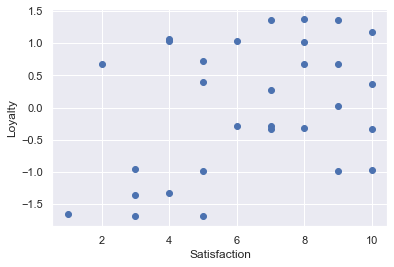

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
# using matplotlib to visualise the data of loyalty and satisfaction levels

### Select the features

In [5]:
x = data.copy()

### Clustering

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)
# the k value (in brackets) is number of clusters we want to make

KMeans(n_clusters=2)

### Clustering Results

In [7]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)
# Cluster_pred will contain the predictions by the algorithm of how the customers will be clustered

Text(0, 0.5, 'Loyalty')

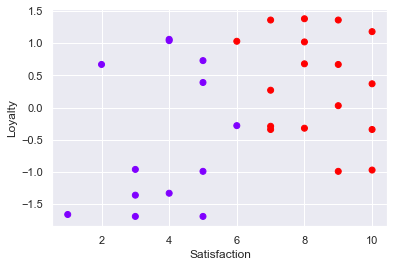

In [8]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
# Using matplotlib to visualise the customers in their clusters using the 'rainbow' colour palette

In [9]:
# Clustering here has clustered the data by satisfaction being greater or less than 6.
# The problem is that the algorithm ONLY considered satisfaction as a feature as the Loyalty values are much smaller

# To fix this we can standardise the 'satisfaction' variable to give it equal weight
# as the other variable (loyalty)

### Standardising the variables to give equal weight to 'Satisfaction' and 'Loyalty'

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
# preprocessing.scale is a method from the sklearn library which scales each variable separately,
# each column will be standardised with respect to itself
# now 'x_scaled' contains the standardised 'satisfaction' and the same values for loyalty (as loyalty was already standardised)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### Take advantage of the elbow method

In [11]:
wcss =[]
for i in range (1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
# as range is from 1-10 we will only get 9 cluster solutions (arbitrary decision)
# the elbow method is used to find the optimal number of clusters to put data in


wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.363006425346783,
 4.437207370163693,
 3.8231980448085183]

Text(0, 0.5, 'WCSS')

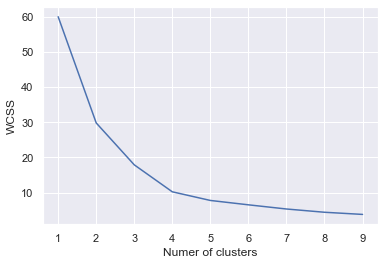

In [12]:
plt.plot(range(1, 10), wcss)
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')
# using the matplotlib library to plot a graph of the elbow method.

## Explore clustering solutions and select the number of clusters

In [13]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
# it is difficult to say here where the optimal number of clusters are
# it looks like after 4 clusters the reduction of the WCSS drops the most so we will use this

In [14]:
clusters_new
# the dataframe uses the original values (2 left columns)
# and the cluster predictions are based on the standardised form of the data (right column)

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

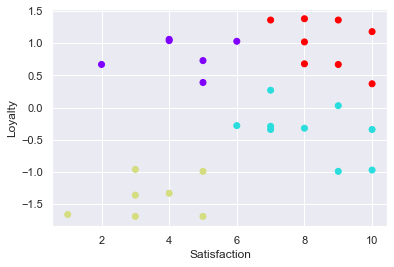

In [15]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
# we will plot the data without standardising it but the solution itself will be the standardised one
# Using matplotlib to visualise the customers in their clusters using the 'rainbow' colour palette

#### After changing the Kmeans cluster number many times trying 2, 3 and finally 4
#### 4 clusters here seem the best option as it includes a large difference between clusters while keeping in-cluster similarity high
#### Identifying the clusters with names:
#### Low satisfaciton and loyalty we'll call "Alienated Cluster", high loyalty but low satisfaction we'll call "Supporter Cluster"
#### the high satisfaction and loyalty we'll call "Fan Cluster", and finally high satisfaction but low loyalty we'll call
#### "Roamers" (they like the brand but aren't loyal to it)